# 11_19_THU 분류모델

SVM,
KNN,
나이브베이지안분류 등

HMEQ 대출관련 데이터분석  
대출을 해주는데 있어 영향을 많이 끼치는것  
목표변수 BAD(Default 1-불이행, 0-상환) - 이번에 목표변수는 이산형  
관심있는이벤트(항목)을 보통 1로함 - 예 (불량-1, 양품-0)  

Odds(오즈, 승산) p/(1-p)  


로지스틱 회귀분석 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/HMEQ.csv", engine='python',encoding='cp949')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [7]:
df_train, df_test = train_test_split(df_raw,
                                    test_size=0.3,
                                    random_state = 1234)

print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2623, 13)
test data size: (1125, 13)


In [8]:
log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE +VALUE + C(REASON) + C(JOB)+ YOJ +DEROG +\
+DELINQ + CLAGE + NINQ + DEBTINC",df_train)


log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.238934
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2607
Method:                           MLE   Df Model:                           15
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.2214
Time:                        00:29:10   Log-Likelihood:                -626.72
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 9.781e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.2446      0.557     -9.417      0.000      -6.336      -4.153

In [9]:
y_pred = log_result.predict(df_test)

y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

1721    0
822     0
1686    0
789     0
165     0
dtype: int64

In [10]:
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_test["BAD"], y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["BAD"], y_pred_class)))

Accuracy:0.924

Confusion Matrix:
[[1017    4]
 [  81   23]]


<AxesSubplot:>

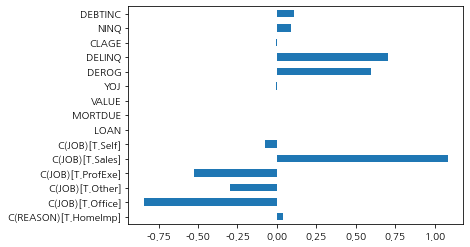

In [11]:
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]},
                               index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef',legend = False)

In [14]:
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes( exclude = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled,df_char], axis =1)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   float64
 1   LOAN     3748 non-null   float64
 2   MORTDUE  3748 non-null   float64
 3   VALUE    3748 non-null   float64
 4   YOJ      3748 non-null   float64
 5   DEROG    3748 non-null   float64
 6   DELINQ   3748 non-null   float64
 7   CLAGE    3748 non-null   float64
 8   NINQ     3748 non-null   float64
 9   CLNO     3748 non-null   float64
 10  DEBTINC  3748 non-null   float64
 11  REASON   3748 non-null   object 
 12  JOB      3748 non-null   object 
dtypes: float64(11), object(2)
memory usage: 380.8+ KB


In [13]:
df_scaled["BAD"] = np.where(df_scaled["BAD"]>0,1,0)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   float64
 2   MORTDUE  3748 non-null   float64
 3   VALUE    3748 non-null   float64
 4   YOJ      3748 non-null   float64
 5   DEROG    3748 non-null   float64
 6   DELINQ   3748 non-null   float64
 7   CLAGE    3748 non-null   float64
 8   NINQ     3748 non-null   float64
 9   CLNO     3748 non-null   float64
 10  DEBTINC  3748 non-null   float64
 11  REASON   3748 non-null   object 
 12  JOB      3748 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 380.8+ KB


In [16]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled,
                                    test_size=0.3,
                                    random_state = 1234)

print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2623, 13)
test data size: (1125, 13)


In [17]:
scaled_log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE +VALUE + C(REASON) + C(JOB)+ YOJ +DEROG +\
+DELINQ + CLAGE + NINQ + DEBTINC",df_scaled_train)

scaled_log_result = scaled_log_model.fit()

print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.238934
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2607
Method:                           MLE   Df Model:                           15
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.2214
Time:                        09:52:22   Log-Likelihood:                -626.72
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 9.781e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4689      0.205    -12.057      0.000      -2.870      -2.068

<AxesSubplot:>

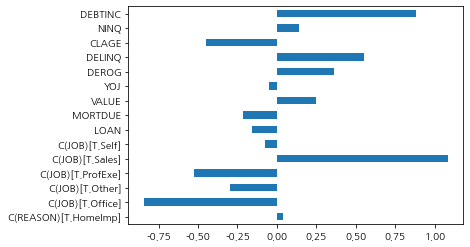

In [18]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef",legend=False)

# 의사결정 나무  
  
    
      
        
        



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV


import graphviz

In [2]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/HMEQ.csv", engine='python',encoding='cp949')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [22]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [23]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [24]:
df_raw_y = df_raw_dummy["BAD"]
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)


In [25]:
df_train_y

3164    0
3314    1
93      1
1456    0
3327    0
       ..
3276    0
3125    0
1318    0
723     0
2863    0
Name: BAD, Length: 2623, dtype: int64

In [26]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

DecisionTreeClassifier(random_state=1234)

In [64]:

print("Accuracy on traing set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

print("Accuracy on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on traing set:1.000
Accuracy on test set:0.932


In [28]:
train_accuracy = []; test_accuracy=[]
para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth=v_max_depth)
    
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainAccuracy"] = train_accuracy
df_score_depth["TestAccuracy"] = test_accuracy

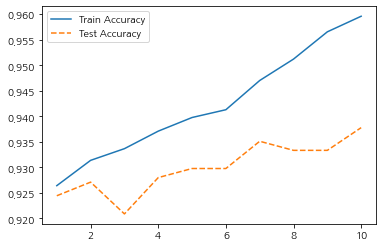

In [29]:
df_score_depth.round(3)

plt.plot(para_depth,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

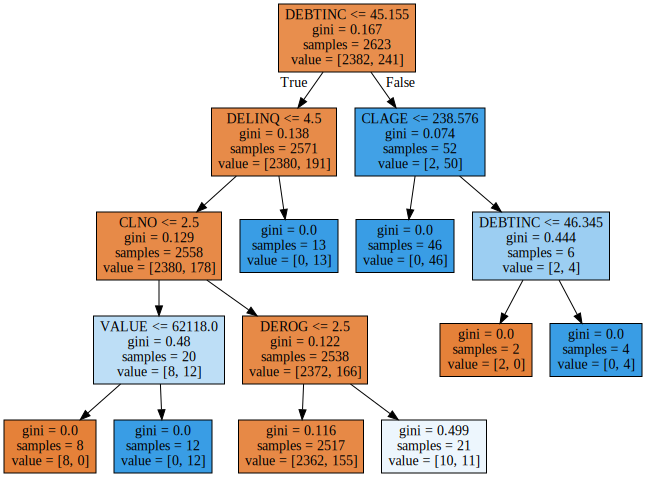

In [30]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_depth.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_depth.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [31]:
train_accuracy = []; test_accuracy=[]
para_split = [s_split*10 for s_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth=4,
                                 min_samples_split=v_min_samples_split)
    
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    

    
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["TrainAccuracy"] = train_accuracy
df_score_split["TestAccuracy"] = test_accuracy

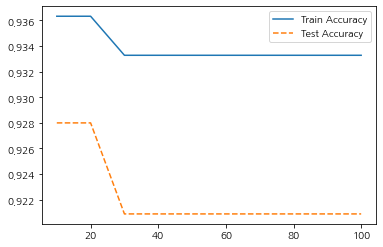

In [32]:
df_score_split.round(3)

plt.plot(para_split,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

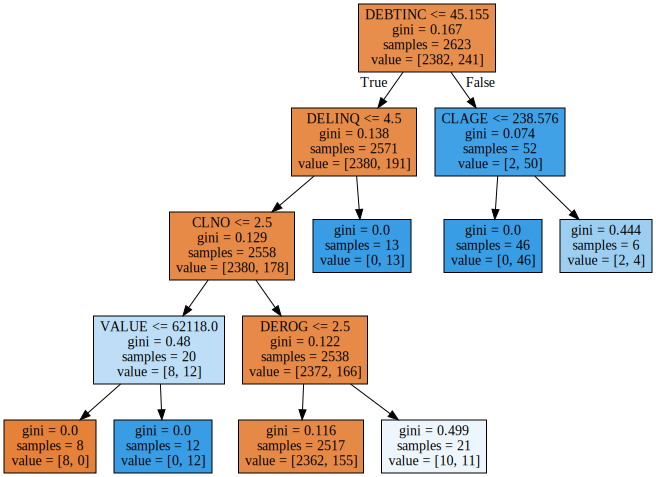

In [33]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234, max_depth=4, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split20.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_split20.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

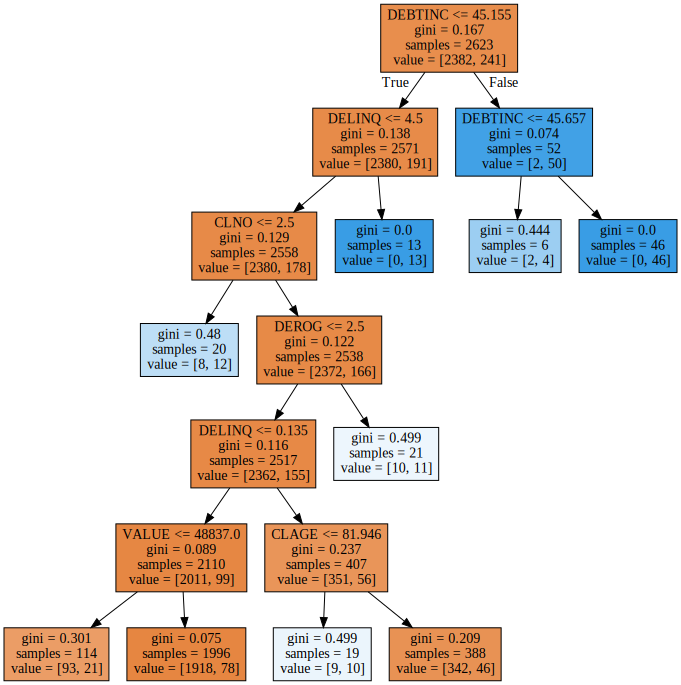

In [34]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234, max_depth=6, min_samples_split=30)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split30.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_split30.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [35]:
train_accuracy = []; test_accuracy=[]
para_leaf = [n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth=6,
                                 min_samples_split=20, min_samples_leaf=v_min_samples_leaf)
    
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf["TrainAccuracy"] = train_accuracy
df_score_leaf["TestAccuracy"] = test_accuracy

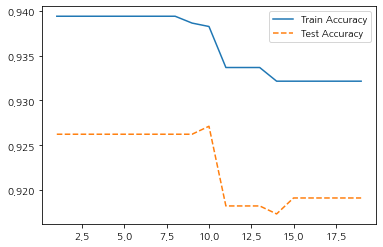

In [36]:
df_score_leaf.round(3)

plt.plot(para_leaf,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

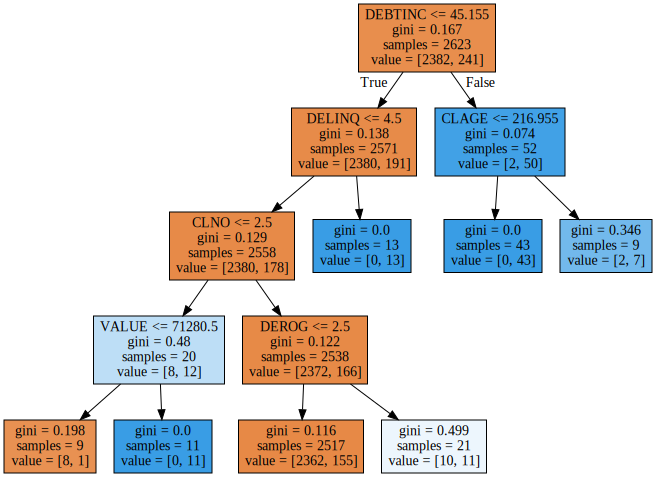

In [37]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234, max_depth=4, min_samples_split=20, min_samples_leaf=9)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf9.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf9.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [38]:
tree_final = DecisionTreeClassifier(min_samples_leaf=9, min_samples_split=20, max_depth=4, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, min_samples_split=20,
                       random_state=1234)

In [63]:

print("Accuracy on traing set:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))

print("Accuracy on test set:{:.3f}".format(tree_final.score(df_test_x,df_test_y)))

Accuracy on traing set:0.936
Accuracy on test set:0.928


In [40]:
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.611
5,DELINQ,0.170
8,CLNO,0.086
4,DEROG,0.068
2,VALUE,0.060
6,CLAGE,0.006
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000


Text(0, 0.5, '변수')

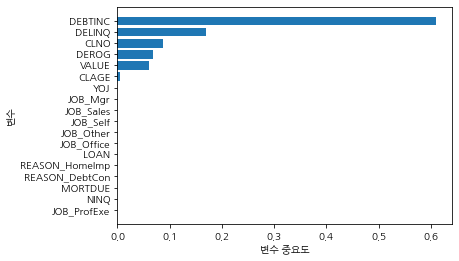

In [41]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# GridSearchCV

In [42]:
# estimator = DecisionTreeClassifier()
# param_grid = {"min_samples_split":para_split,"max_depth":para_depth,"min_samples_leaf":para_leaf}

# grid_gt= GridSearchCV(estimator, param_grid, scoring='accuracy',n_jobs=-1)
# grid_gt.fit(df_train_x,df_train_y)

# print("Best estimator model:\n{}".format(grid_gt.best_estimator_))
# print("\n best parameter:\n{}".format(grid_gt.best_params_))
# print("Best score:\n{}".format(grid_gt.best_score_.round(3)))

# 앙상블 랜덤포레스트, 그래디언트부스팅

In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import graphviz

In [44]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [45]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/HMEQ.csv", engine='python',encoding='cp949')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [46]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [47]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [48]:
df_raw_y = df_raw_dummy["BAD"]
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)


In [49]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Score on traing set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on traing set:1.000
Score on test set:0.946


In [50]:
train_accuracy = []; test_accuracy=[]
para_n_tree = [n_tree * 10   for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234, n_estimators=v_n_estimators)
    
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    

    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

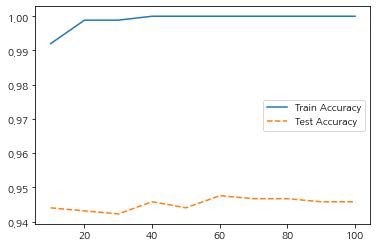

In [51]:
df_accuracy_n.round(3)

plt.plot(para_n_tree,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

# OOB

In [52]:
oob_error = []

for v_n_estimators in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimators, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This prob

Text(0.5, 0, 'n_estimators')

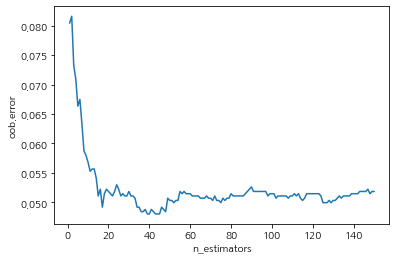

In [53]:
plt.plot(range(1,151),oob_error)
plt.ylabel('oob.error')
plt.xlabel('n_estimators')


In [54]:
#n_estimator = 40

In [55]:
train_accuracy = []; test_accuracy=[]
para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state = 1234,n_estimators = 40, max_depth=v_max_depth)
    
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

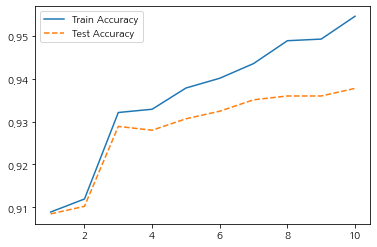

In [56]:
df_accuracy_depth.round(3)

plt.plot(para_depth,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [57]:
train_accuracy = []; test_accuracy=[]
para_split = [s_split*10 for s_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state = 1234, max_depth=4,n_estimators =40,
                                 min_samples_split=v_min_samples_split)
    
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    

    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSampleSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

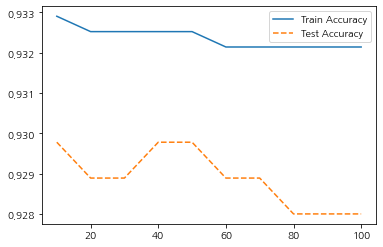

In [58]:
df_accuracy_split.round(3)

plt.plot(para_split,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [59]:
train_accuracy = []; test_accuracy=[]
para_leaf = [n_leaf*10 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, max_depth=4, n_estimators =40,
                                  min_samples_leaf=v_min_samples_leaf)
    
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    

    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSampleLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

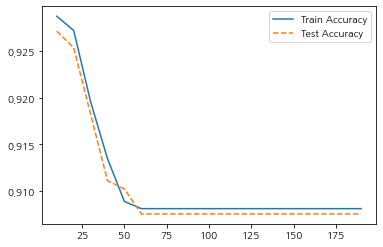

In [60]:
df_accuracy_leaf.round(3)

plt.plot(para_leaf,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [61]:
rf_final = RandomForestClassifier(min_samples_leaf=20,  max_depth=4,n_estimators=40,
                                  random_state=1234)
rf_final.fit(df_train_x,df_train_y)
y_pred = rf_final.predict(df_test_x)

In [62]:

print("Accuracy on traing set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))

print("Accuracy on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on traing set:0.927
Accuracy on test set:0.925
Confusion matrix:
[[1021    0]
 [  84   20]]


train/test 데이터의 정분류율이 비슷한 수준으로 안정적인 모델임을 확인할 수 있음

In [210]:
v_feature_name = df_train_x.columns

df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.454
5,DELINQ,0.192
4,DEROG,0.068
7,NINQ,0.067
6,CLAGE,0.061
8,CLNO,0.052
2,VALUE,0.034
0,LOAN,0.031
3,YOJ,0.016
1,MORTDUE,0.010


Text(0, 0.5, '변수')

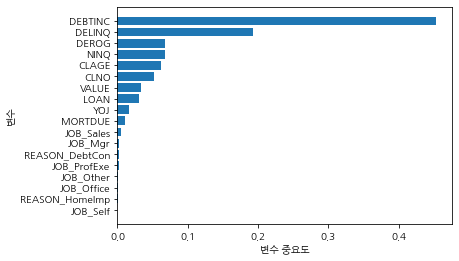

In [211]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")